In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading datasets

# Dataset 1: Global data set on micro- and mesoplastic loads in marine sediments
dataset1 = pd.read_csv("Micro_Mesoplastic_data_1.csv")

# Dataset 2: Mismanaged Waste data
dataset2 = pd.read_csv("plastic_recycling_data_5.csv")

# Dataset 3: plastic pollution waste generation data
dataset3 = pd.read_csv("plastic_pollution_waste_generation_data.csv")

# Dataset 4: global-plastics-production
dataset4 = pd.read_csv("global-plastics-production.csv")

# Dataset 5: annual plastic disposal data
dataset6 = pd.read_csv("plastic_disposal_data.csv")

In [ ]:
# Dataset 1: Data cleaning and handling
dataset1.dropna(inplace=True)  # Remove rows with missing values
dataset1.drop(columns=["ID", "Reference "], inplace=True)  # Remove irrelevant columns
dataset1["Sampling_date"] = pd.to_datetime(dataset1["Sampling_date"])  # Convert date column to datetime format

# Feature engineering
dataset1["Total_Plastic_Abundance"] = dataset1["Plastic_abundance_converted (n kg-1)"] + dataset1["Abundance_fibers (n kg-1)"]
dataset1["Proportion_Fibers"] = dataset1["Abundance_fibers (n kg-1)"] / dataset1["Total_Plastic_Abundance"]

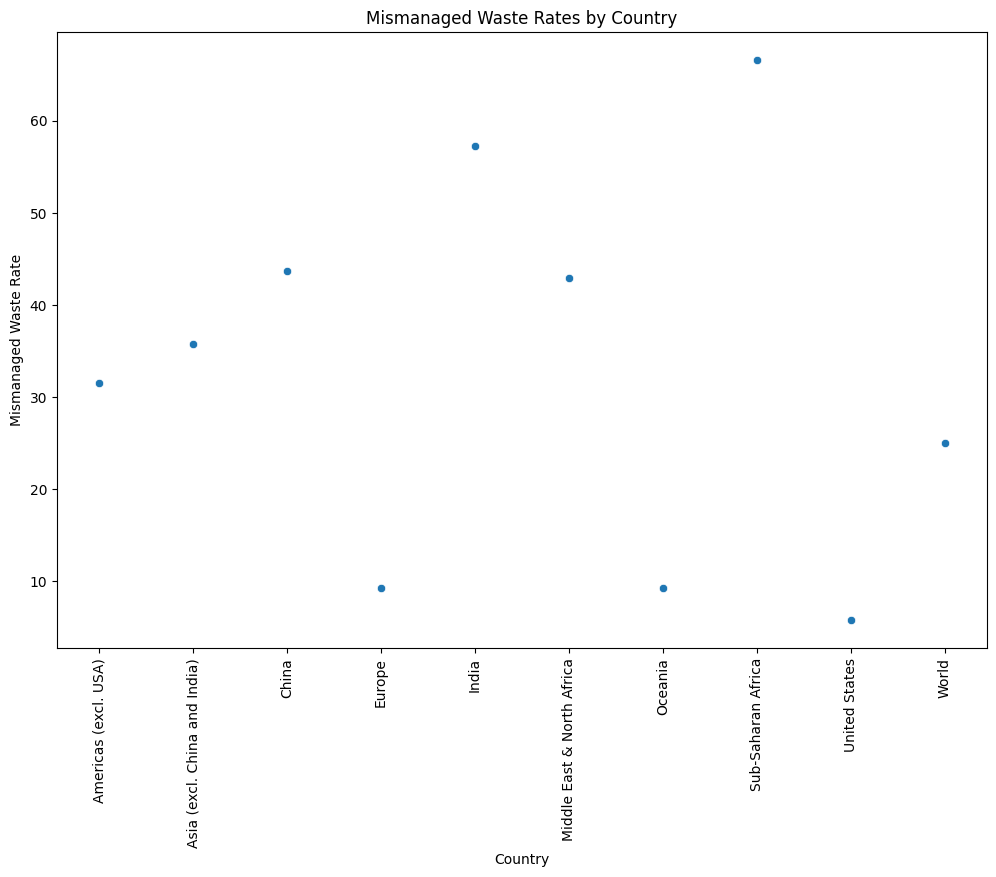

In [ ]:
# Task 1: Understanding waste management gaps

mismanaged_rates = dataset2.groupby('Country')['Share of littered and mismanaged from total regional waste'].mean()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=mismanaged_rates.index, y=mismanaged_rates.values)
plt.title('Mismanaged Waste Rates by Country')
plt.xticks(rotation=90)
plt.ylabel('Mismanaged Waste Rate')
plt.show()


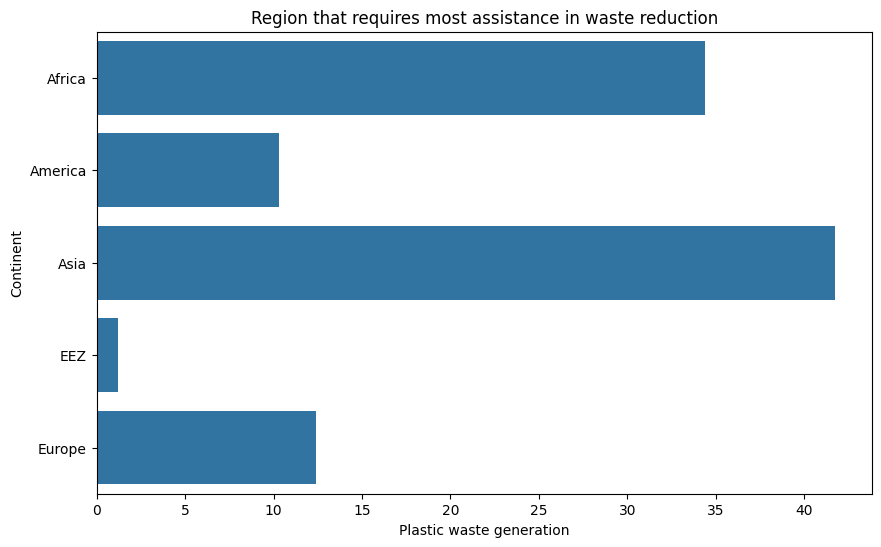

In [ ]:
# Task 2: Identifying major contributors to ocean pollution

waste_management_df = dataset1[["Continent", "Total_Plastic_Abundance"]]

# Group by country and calculate total plastic waste
total_plastic_waste = waste_management_df.groupby("Continent")["Total_Plastic_Abundance"].sum()


total_plastic_waste_pct = total_plastic_waste / total_plastic_waste.sum() * 100

# Plot a bar chart showing plastic waste percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=total_plastic_waste_pct.values, y=total_plastic_waste_pct.index)
plt.xlabel("Plastic waste generation")
plt.ylabel("Continent")
plt.title("Region that requires most assistance in waste reduction")
plt.show()

Average Recycling Rate: 6.36%
Average Mismanaged Waste Rate: 32.70%


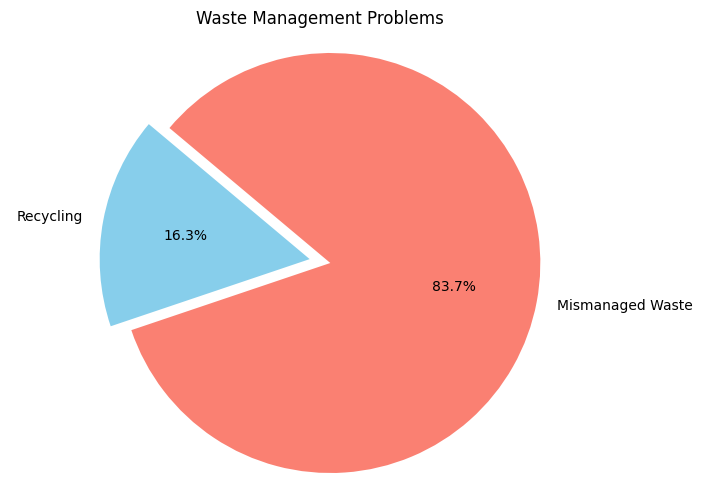

In [ ]:
# Task 3: Evaluating the effectiveness of waste management practices

#We’ll compare recycling rates with mismanaged waste rates to assess the effectiveness of different waste management strategies.

# Calculate average recycling rate
avg_recycling_rate = dataset2['Share of waste recycled from total regional waste'].mean()

# Calculate average mismanaged waste rate
avg_mismanaged_rate = dataset2['Share of littered and mismanaged from total regional waste'].mean()

# Print results
print(f"Average Recycling Rate: {avg_recycling_rate:.2f}%")
print(f"Average Mismanaged Waste Rate: {avg_mismanaged_rate:.2f}%")

# Create data for the pie chart
labels = ['Recycling', 'Mismanaged Waste']
sizes = [avg_recycling_rate, avg_mismanaged_rate]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # Explode the first slice (Recycling) for emphasis

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Waste Management Problems')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

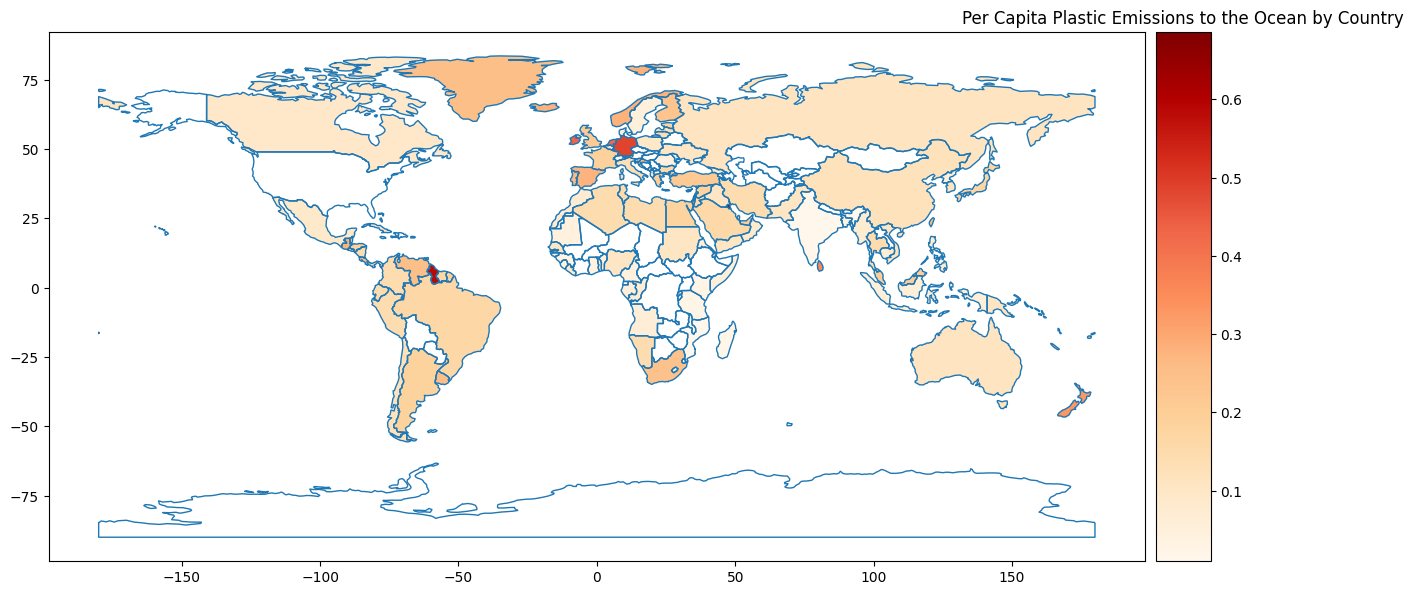

In [ ]:
# Task 4: Informing waste reduction strategies

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'country_data' is a DataFrame containing the country names and their corresponding plastic emission values
# Merge this data with the world GeoDataFrame
world = world.merge(dataset3, how="left", left_on="name", right_on="Country")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Per capita plastic waste (kg/person/day)', ax=ax, legend=True, cax=cax, cmap='OrRd')

plt.title('Per Capita Plastic Emissions to the Ocean by Country')
plt.show()

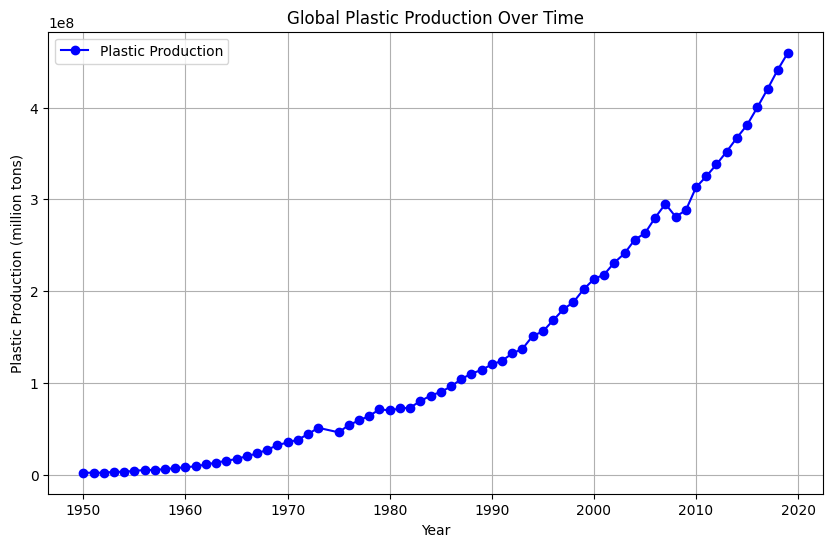

In [ ]:
# Task 5: Global Plastic Production and Disposal Analysis

plt.figure(figsize=(10, 6))
plt.plot(dataset4["Year"], dataset4["Annual plastic production between 1950 and 2019"], marker="o", color="b", label="Plastic Production")
plt.xlabel("Year")
plt.ylabel("Plastic Production (million tons)")
plt.title("Global Plastic Production Over Time")
plt.grid(True)
plt.legend()
plt.show()

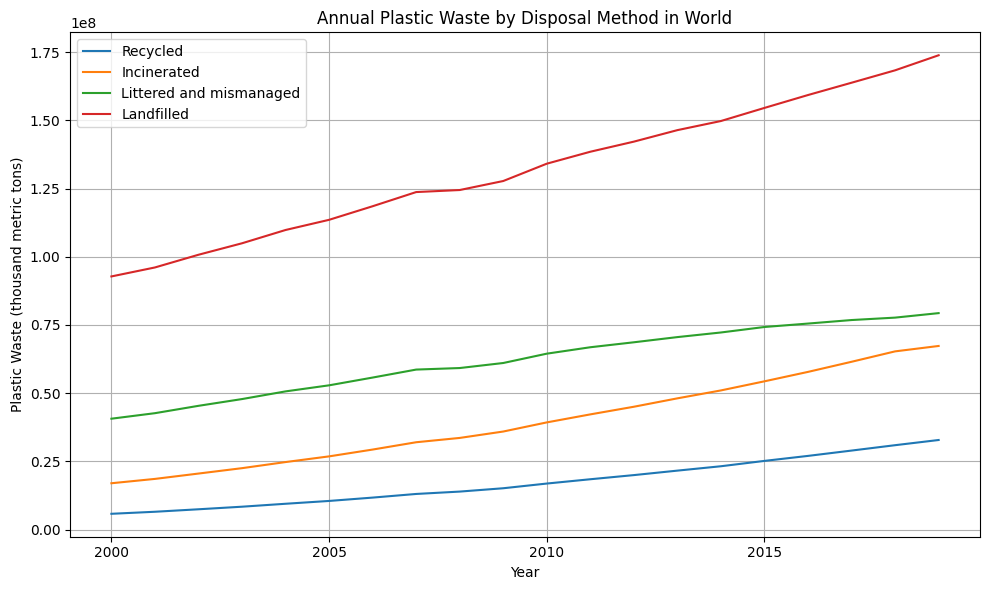

In [ ]:
# Create the line graph
plt.figure(figsize=(10, 6))

years = dataset6["Year"]
plt.plot(years, dataset6["Recycled"], label='Recycled')
plt.plot(years, dataset6["Incinerated"], label='Incinerated')
plt.plot(years, dataset6["Littered and mismanaged"], label='Littered and mismanaged')
plt.plot(years, dataset6["Landfilled"], label='Landfilled')

plt.xlabel('Year')
plt.ylabel('Plastic Waste (thousand metric tons)')
plt.title('Annual Plastic Waste by Disposal Method in World')
plt.legend()
plt.xticks(years[::5])
plt.grid(True)
plt.tight_layout()
plt.show()